In [2]:
# load data

import numpy as np
import pandas as pd

train_df = pd.read_csv('/Users/sjx/Desktop/CS5785/ass1/titanic/train.csv')
print(train_df.shape)

test_df = pd.read_csv('/Users/sjx/Desktop/CS5785/ass1/titanic/test.csv')
print(test_df.shape)

sol_df = pd.read_csv('/Users/sjx/Desktop/CS5785/ass1/titanic/gender_submission.csv')
print(sol_df.shape)

(891, 12)
(418, 11)
(418, 2)


In [24]:
# preprocessing
train_df = train_df[['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
test_df = test_df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# category to numeric
train_df['Sex'] = train_df['Sex'].astype('category').cat.codes
test_df['Sex'] = test_df['Sex'].astype('category').cat.codes
train_df['Embarked'] = train_df['Embarked'].astype('category').cat.codes
test_df['Embarked'] = test_df['Embarked'].astype('category').cat.codes

# fill empty entry 
train_df['Age'].fillna(train_df['Age'].median(),inplace=True)
train_df.Fare.fillna(train_df.Fare.mean(),inplace=True)
train_df.Embarked.fillna(train_df.Embarked.mean(),inplace=True)
print(train_df.isnull().values.any())

test_df['Age'].fillna(test_df['Age'].median(),inplace=True)
test_df.Fare.fillna(train_df.Fare.mean(),inplace=True)
print(test_df.isnull().values.any())

# null_columns=test_df.columns[test_df.isnull().any()]
# print(test_df[test_df.isnull().any(axis=1)][null_columns].head())

False
False
Empty DataFrame
Columns: []
Index: []


            0    1
Total     314  577
Survived  233  109
Died       81  468


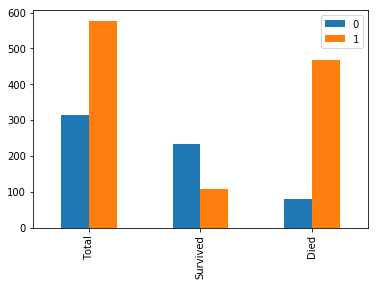

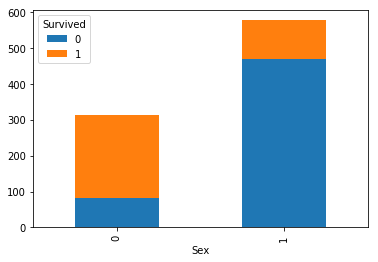

In [19]:
# select feature
# sex

import matplotlib.pyplot as plt

total = train_df['Sex'].value_counts()
survived_sex = train_df[train_df['Survived']==1]['Sex'].value_counts()
died_sex = train_df[train_df['Survived']==0]['Sex'].value_counts()
temp = pd.DataFrame([total,survived_sex,died_sex])
temp.index = ['Total','Survived','Died']
print(temp)
temp.plot(kind='bar')
plt.show()

train_df.groupby(['Sex','Survived'])['PassengerId'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

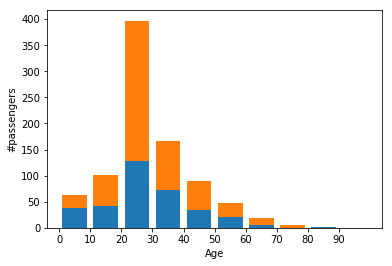

In [9]:
# select feature
# age

plt.hist([train_df[train_df['Survived']==1]['Age'], train_df[train_df['Survived']==0]['Age']], 10, range=(0,100), rwidth=0.8, stacked=True)

plt.xlabel('Age')
plt.ylabel('#passengers')
plt.xticks(np.arange(0, 100, step=10))
plt.show()

            1    2    3
Total     216  184  491
Survived  136   87  119
Died       80   97  372


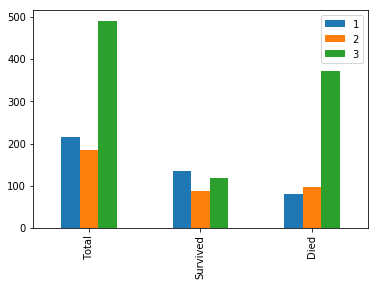

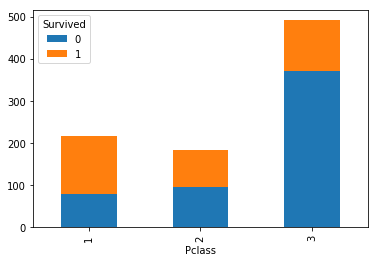

In [10]:
# select feature
# pclass

total = train_df['Pclass'].value_counts()
survived_pclass = train_df[train_df['Survived']==1]['Pclass'].value_counts()
died_pclass = train_df[train_df['Survived']==0]['Pclass'].value_counts()
temp = pd.DataFrame([total,survived_pclass,died_pclass])
temp.index = ['Total','Survived','Died']
print(temp)
temp.plot(kind='bar')
plt.show()

train_df.groupby(['Pclass','Survived'])['PassengerId'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

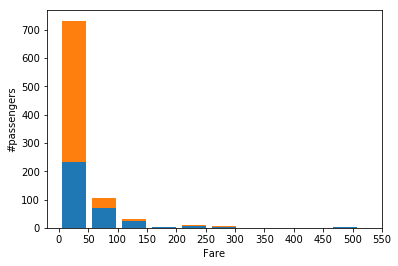

In [18]:
# select feature
# fare

plt.hist([train_df[train_df['Survived']==1]['Fare'], train_df[train_df['Survived']==0]['Fare']], 10, range=(train_df['Fare'].values.min(),train_df['Fare'].values.max()), rwidth=0.8, stacked=True)

plt.xlabel('Fare')
plt.ylabel('#passengers')
plt.xticks(np.arange(0, 600, step=50))
plt.show()

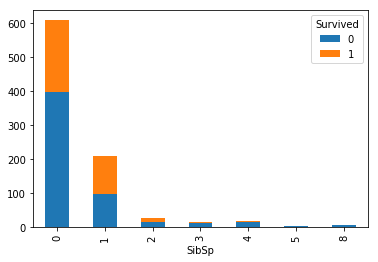

In [10]:
# select feature
# sibsp

train_df.groupby(['SibSp','Survived'])['PassengerId'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

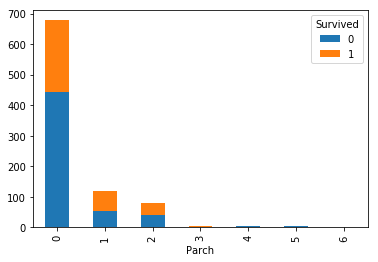

In [11]:
# select feature
# parch

train_df.groupby(['Parch','Survived'])['PassengerId'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

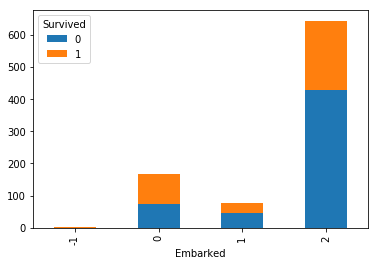

In [12]:
# select feature
# embarked

train_df.groupby(['Embarked','Survived'])['PassengerId'].size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [27]:
# classifier

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# test w/ 'Sex'
X_train = train_df[['PassengerId', 'Sex']]
y_train = train_df['Survived']
test = test_df[['PassengerId', 'Sex']]

logreg.fit(X_train, y_train)
predicted = logreg.predict(test)

correct = 0
for i in range(0, len(predicted)):
    if predicted[i] == sol_df['Survived'][i]:
        correct = correct + 1
acc = correct/len(predicted)
print(acc)

# pick necessary features
X_train = train_df[['PassengerId','Sex','Age','Pclass','Fare','SibSp','Parch','Embarked']]
y_train = train_df[['Survived']]
test = test_df[['PassengerId','Sex','Age','Pclass','Fare','SibSp','Parch','Embarked']]

logreg.fit(X_train, y_train)
predicted = logreg.predict(test)

output = {'PassengerId': list(range(892, test.shape[0]+892)),
         'Survived': predicted}
# print(output)
df = pd.DataFrame(output, columns = ['PassengerId', 'Survived'])
df.to_csv('titanic_all_out.csv')
print("Out to file.")

1.0
Out to file.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
